## Final Project Submission

Please fill out:
* Student name: AGNES CHOMBA
* Student pace: Part Time
* Scheduled project review date/time: 29/04/2025
* Instructor name: MARYANN MWIKALI
* Blog post URL:


#  Aircraft Risk Analysis for Investment Decisions

## Problem Statement

The organization is planning to diversify its portfolio by entering the aviation industry through the purchase of aircraft for commercial and private use. While this offers new growth opportunities, it also introduces substantial risks.Hence, a thorough risk assessment is required to ensure the investment is viable and sustainable.

## Project Goal
To indetify the aircraft with the lowest risk for company to venture in.

# Data Source and Data Exploration

The data comes from a kaggle from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.
I initially selected 16 columns to work with for data visualization.





In [1]:
# Your code here - remember to use markdown cells for comments as well!
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#importing and loading the dataset  
df= pd.read_csv('Data/Aviation_Data.csv', index_col=0)
# Display the first 5 rows of the dataset to understand its structure
df.head()

c:\Users\Administrator\anaconda31\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,Fatal(3),...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90348 entries, 20001218X45444 to 20221230106513
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      90348 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Latitude                34382 non-null  object 
 6   Longitude               34373 non-null  object 
 7   Airport.Code            50249 non-null  object 
 8   Airport.Name            52790 non-null  object 
 9   Injury.Severity         87889 non-null  object 
 10  Aircraft.damage         85695 non-null  object 
 11  Aircraft.Category       32287 non-null  object 
 12  Registration.Number     87572 non-null  object 
 13  Make                    88826 non-null  object 
 14  Model                

Selected 16 columns from the original dataset for the data cleaning process and subsequent visualization to provide insights on low-risk aircrafts to invest in.

In [4]:
# List of relevant columns for the risk assessment
relevant_columns = [
    'Investigation.Type', 'Accident.Number', 'Event.Date', 'Injury.Severity', 'Aircraft.damage',
    'Aircraft.Category', 'Make', 'Model', 'Number.of.Engines', 'Engine.Type',
    'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Weather.Condition',
    'Broad.phase.of.flight', 'Purpose.of.flight', 'Total.Uninjured'
]

In [5]:
filtered_df = df[relevant_columns]
# Filter out rows with missing values in the relevant columns
filtered_df.head()

,Investigation.Type,Accident.Number,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Weather.Condition,Broad.phase.of.flight,Purpose.of.flight,Total.Uninjured
Event.Id,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,Fatal(2),Destroyed,NaN,Stinson,108-3,1.0,Reciprocating,2.0,0.0,UNK,Cruise,Personal,0.0
20001218X45447,Accident,LAX94LA336,1962-07-19,Fatal(4),Destroyed,NaN,Piper,PA24-180,1.0,Reciprocating,4.0,0.0,UNK,Unknown,Personal,0.0
20061025X01555,Accident,NYC07LA005,1974-08-30,Fatal(3),Destroyed,NaN,Cessna,172M,1.0,Reciprocating,3.0,NaN,IMC,Cruise,Personal,NaN
20001218X45448,Accident,LAX96LA321,1977-06-19,Fatal(2),Destroyed,NaN,Rockwell,112,1.0,Reciprocating,2.0,0.0,IMC,Cruise,Personal,0.0
20041105X01764,Accident,CHI79FA064,1979-08-02,Fatal(1),Destroyed,NaN,Cessna,501,NaN,NaN,1.0,2.0,VMC,Approach,Personal,0.0


In [6]:
# Basic information about the filtered dataset
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90348 entries, 20001218X45444 to 20221230106513
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      90348 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Injury.Severity         87889 non-null  object 
 4   Aircraft.damage         85695 non-null  object 
 5   Aircraft.Category       32287 non-null  object 
 6   Make                    88826 non-null  object 
 7   Model                   88797 non-null  object 
 8   Number.of.Engines       82805 non-null  float64
 9   Engine.Type             81812 non-null  object 
 10  Total.Fatal.Injuries    77488 non-null  float64
 11  Total.Serious.Injuries  76379 non-null  float64
 12  Weather.Condition       84397 non-null  object 
 13  Broad.phase.of.flight   61724 non-null  object 
 14  Purpose.of.flight    

In [7]:
#Check missing value count
print(df[relevant_columns].isnull().sum())

Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Make                       1522
Model                      1551
Number.of.Engines          7543
Engine.Type                8536
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Weather.Condition          5951
Broad.phase.of.flight     28624
Purpose.of.flight          7651
Total.Uninjured            7371
dtype: int64


In [8]:
#Summary statistics of the dataset
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


For data cleaning, I first checked for missing values in the relevant columns. I decided to drop the 'Aircraft.Category' column due to its high number of missing values (58,061 out of 90,348 entries), which made it unreliable for analysis. I also dropped  missing values in critical fields like 'Accident.Number', 'Event.Date', 'Make', and 'Model' to ensure that key information was retained.

For columns like 'Total.Fatal.Injuries', 'Total.Serious.Injuries', and 'Total.Uninjured', I filled missing values with zeros. This is because these columns represent counts of injuries or uninjured individuals, and the minimum value is 0.

For categorical columns such as 'Injury.Severity', 'Aircraft.damage', and 'Engine.Type', I filled missing values with the mode, which is the most frequent value in the column. This is because these columns typically have a dominant category, and filling with the mode ensures consistency with the majority of the data.

Lastly, for the 'Number.of.Engines' column, I filled missing values with the median. Given that 75% of the entries have 1 engine, the median is a better representation of the central tendency than the mean, as it minimizes the impact of outliers.

In [9]:
# Data Cleaning and Preprocessing
def clean_aviation_data(df):
    # Drop rows with critical missing values
    df = df.dropna(subset=['Accident.Number', 'Event.Date', 'Make', 'Model'])

    # Fill categorical columns with mode (most frequent value)
    categorical_cols = [
        'Injury.Severity', 'Aircraft.damage', 'Engine.Type',
        'Weather.Condition', 'Broad.phase.of.flight', 'Purpose.of.flight'
    ]
    for col in categorical_cols:
        if col in df.columns and not df[col].mode().empty:  # Safe check if column exists and mode is not empty
            df[col] = df[col].fillna(df[col].mode()[0])

    # Fill numerical columns
    if 'Number.of.Engines' in df.columns and not df['Number.of.Engines'].median() is None:
        df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].median())

    numerical_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Uninjured']
    for col in numerical_cols:
        if col in df.columns:
            df[col] = df[col].fillna(0)

    # Drop Aircraft.Category if it exists
    if 'Aircraft.Category' in df.columns:
        df = df.drop(columns=['Aircraft.Category'])

    return df


In [10]:
# Display of the first 5 rows of the cleaned dataset
df = clean_aviation_data(filtered_df)
df.head()

<ipython-input-9-a5c70e750a5a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mode()[0])
<ipython-input-9-a5c70e750a5a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].median())
<ipython-input-9-a5c70e750a5a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,Investigation.Type,Accident.Number,Event.Date,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Weather.Condition,Broad.phase.of.flight,Purpose.of.flight,Total.Uninjured
Event.Id,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,Fatal(2),Destroyed,Stinson,108-3,1.0,Reciprocating,2.0,0.0,UNK,Cruise,Personal,0.0
20001218X45447,Accident,LAX94LA336,1962-07-19,Fatal(4),Destroyed,Piper,PA24-180,1.0,Reciprocating,4.0,0.0,UNK,Unknown,Personal,0.0
20061025X01555,Accident,NYC07LA005,1974-08-30,Fatal(3),Destroyed,Cessna,172M,1.0,Reciprocating,3.0,0.0,IMC,Cruise,Personal,0.0
20001218X45448,Accident,LAX96LA321,1977-06-19,Fatal(2),Destroyed,Rockwell,112,1.0,Reciprocating,2.0,0.0,IMC,Cruise,Personal,0.0
20041105X01764,Accident,CHI79FA064,1979-08-02,Fatal(1),Destroyed,Cessna,501,1.0,Reciprocating,1.0,2.0,VMC,Approach,Personal,0.0


In [11]:
df.info()
# Check for missing values again

<class 'pandas.core.frame.DataFrame'>
Index: 88777 entries, 20001218X45444 to 20221230106513
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88777 non-null  object 
 1   Accident.Number         88777 non-null  object 
 2   Event.Date              88777 non-null  object 
 3   Injury.Severity         88777 non-null  object 
 4   Aircraft.damage         88777 non-null  object 
 5   Make                    88777 non-null  object 
 6   Model                   88777 non-null  object 
 7   Number.of.Engines       88777 non-null  float64
 8   Engine.Type             88777 non-null  object 
 9   Total.Fatal.Injuries    88777 non-null  float64
 10  Total.Serious.Injuries  88777 non-null  float64
 11  Weather.Condition       88777 non-null  object 
 12  Broad.phase.of.flight   88777 non-null  object 
 13  Purpose.of.flight       88777 non-null  object 
 14  Total.Uninjured      

In [12]:
# Apply the same text case to all string columns
string_columns = df.select_dtypes(include=['object']).columns
for col in string_columns:
    df[col] = df[col].str.lower().str.strip()


# Data Analysis & Visualization

### a) Top 5 Aircraft Makes Involved in accidents

In [13]:
# group by aircraft make and Investigation.Type
df.groupby(['Make', 'Investigation.Type']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(10)

,Make,Investigation.Type,counts
1301,cessna,accident,26789
5409,piper,accident,14683
658,beech,accident,5176
680,bell,accident,2662
855,boeing,incident,1379
854,boeing,accident,1359
4876,mooney,accident,1311
5905,robinson,accident,1218
2940,grumman,accident,1158
713,bellanca,accident,1040


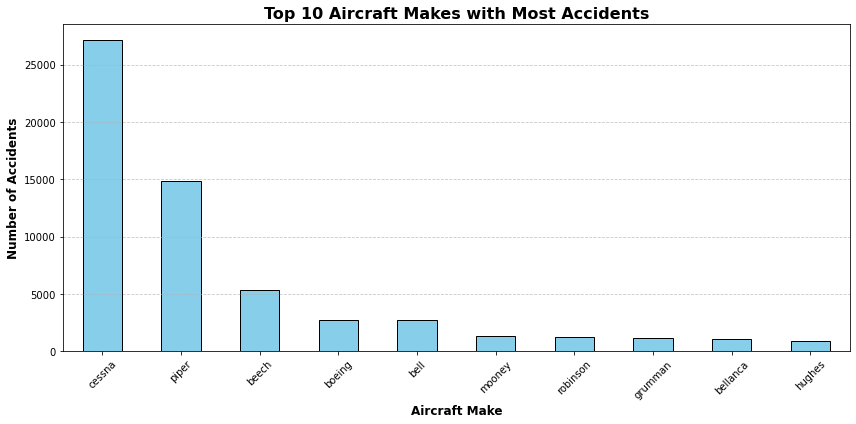

In [14]:
# Get the top 10 aircraft makes
top_makes = df['Make'].value_counts().head(10)

# Plot the data
plt.figure(figsize=(12, 6))
top_makes.plot(kind='bar', color='skyblue', edgecolor='black')



# Add title and labels
plt.title('Top 10 Aircraft Makes with Most Accidents', fontsize=16, fontweight='bold')
plt.xlabel('Aircraft Make', fontsize=12, fontweight='bold')
plt.ylabel('Number of Accidents', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()

### Findings

Cessna and Piper aircraft have by far the highest number of accidents, significantly more than any other manufacturers. Beech and Bell follow, but with far fewer cases. Boeing appears in both accident and incident records, with numbers that are close but still relatively low compared to Cessna and Piper. Other makes like Mooney, Robinson, Grumman, and Bellanca show smaller but still notable accident counts. Based on these findings, it is advisable to focus investment and operational decisions on aircraft models with lower accident rates. Cessna and Piper, despite their popularity, may carry greater operational and insurance risks due to their higher accident numbers. Beech and Bell, though safer by comparison, still warrant cautious evaluation. Boeing presents relatively lower risk levels, but careful review is still necessary.

### b) Checking relationship between Total Injuries in Aircraft Accidents and Number of Engines

In [17]:
df['TotalInjuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Uninjured']
# Calculate the correlation between Number of Engines and Total Injuries
correlation = df['Number.of.Engines'].corr(df['TotalInjuries'])
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: 0.34945559565466067


###  Discussion of Findings
A correlation coefficient of 0.349 indicates a weak to moderate positive relationship, suggesting that as the number of engines increases, total injuries tend to increase as well. However, the correlation is not strong enough to conclude that the number of engines is a dominant factor in predicting injuries, and other factors may play a more significant role in influencing injury rates.

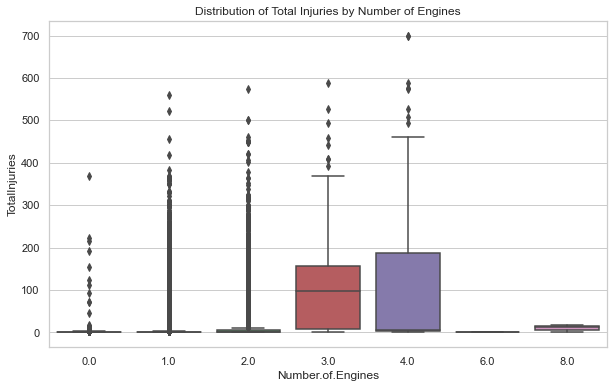

In [ ]:
# Plot a box plot to see the distribution of Total Injuries by Number of Engines
plt.figure(figsize=(10, 6))
sns.boxplot(x='Number.of.Engines', y='TotalInjuries', data=df)
plt.title('Distribution of Total Injuries by Number of Engines')
plt.show()

### Findings and Recommendations

The box plot illustrates the distribution of total injuries across aircraft categorized by the number of engines. Aircraft with 0-2 engines generally exhibit lower median injury counts, though they display a high number of outliers, indicating that while most incidents are minor, there are occasional severe accidents resulting in many injuries. 

In contrast, aircraft with 3-4 engines show significantly higher median injury counts and a wider spread of injuries, suggesting that accidents involving these types tend to be more severe and less predictable. Notably, some cases reach over 600 injuries.

Aircraft with 6-8 engines appear to have relatively few recorded incidents, and the injuries in these cases are low and tightly clustered although more data is required in order to conclude on risk profile.

Investing in aircraft with one or two engines could be considered lower-risk, provided that strong maintenance and safety standards are enforced to mitigate the occasional high-severity events

### c) The Count of Injuries Incurred Due to Different Weather Conditions

In [ ]:
# Total Injuries Caused by Weather Conditions
weather_injuries = (
    df.groupby('Weather.Condition', as_index=False)['TotalInjuries']
    .sum()
    .sort_values(by='TotalInjuries', ascending=False)
    .reset_index(drop=True)
    .head(10)
)

print(weather_injuries)


  Weather.Condition  TotalInjuries
0               vmc       438476.0
1               imc        53648.0
2               unk        20393.0


### Findings
VMC accounts for the highest number of injuries at 438,476. This means that most accidents and resulting injuries happen when the weather is generally clear and visibility is good.

IMC accidents under poor visibility conditions account for 53,648 injuries. This is significantly lower than in VMC, but still notable.

There were also 20,393 injuries reported under unknown weather conditions.

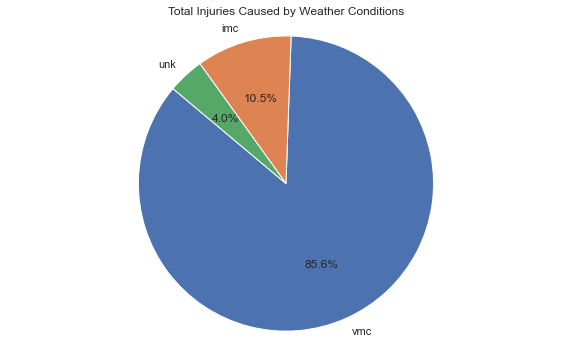

In [ ]:
# Pie chat for Total Injuries Caused by Weather Conditions
plt.figure(figsize=(10, 6))
plt.pie(weather_injuries['TotalInjuries'], labels=weather_injuries['Weather.Condition'], autopct='%1.1f%%', startangle=140)
plt.title('Total Injuries Caused by Weather Conditions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



### Recommendations
From the visualization above, it can be concluded that clear weather does not necessarily translate to a lower accident risk for aircraft. Therefore, increased caution, enhanced training, and strong operational risk management are essential even under good weather conditions. In the case of IMC, it is advisable to invest in aircraft equipped with advanced avionics and navigation systems to further reduce risks.

### d) Accidents Incurred During Different Purposes of Flight

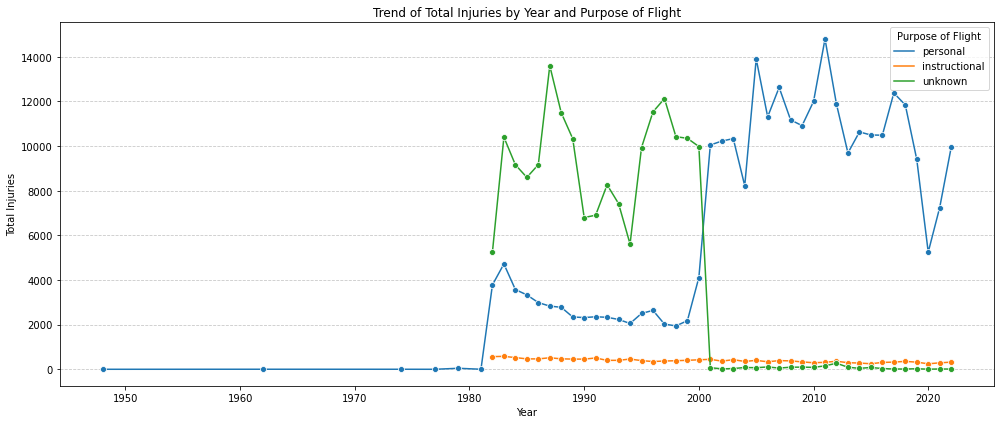

In [ ]:
# Plotting the top 3 aircraft purpose of flight with the most Total  injuries

# Convert Event.Date to datetime and extract Year
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Year'] = df['Event.Date'].dt.year

# Correct column name (remove trailing space)
df.rename(columns={'Purpose.of.flight ': 'Purpose.of.flight'}, inplace=True)

# Group by Year and Purpose of flight, summing the total injuries
injury_trend = df.groupby(['Year', 'Purpose.of.flight'])['TotalInjuries'].sum().reset_index()

# Filter for top 3 most frequent purposes of flight
top_purposes = df['Purpose.of.flight'].value_counts().nlargest(3).index
injury_trend = injury_trend[injury_trend['Purpose.of.flight'].isin(top_purposes)]

# Plot the trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=injury_trend, x='Year', y='TotalInjuries', hue='Purpose.of.flight', marker='o')
plt.title('Trend of Total Injuries by Year and Purpose of Flight')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.legend(title='Purpose of Flight')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Findings
From the line graph above, it is evident that most injuries occur during personal flights over the years, followed by flights with an undefined or unknown purpose. Instructional flights rank third in terms of injury frequency. 

It is therefore recommended that investments should focus on the instructional aviation sector and related areas. Training institutions and aircraft used for flight instruction present a lower injury risk, which translates into lower operational liabilities.

### e) Count of Occurences per phase of Flight

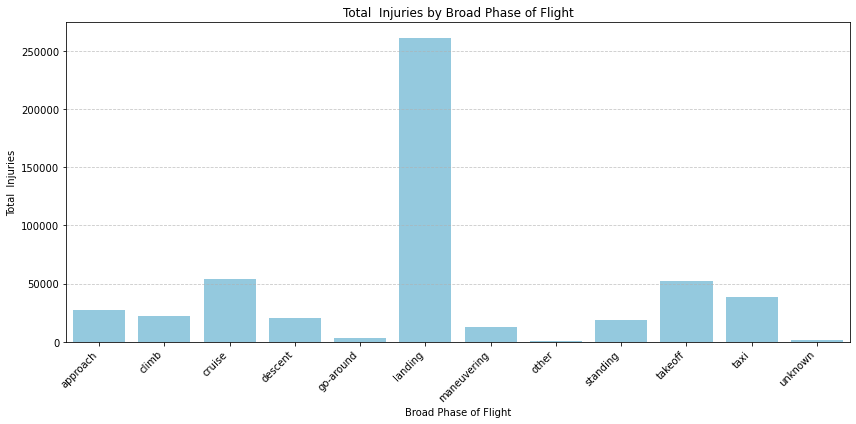

In [ ]:
# Plotting the distribution of Total Fatal Injuries
phase_fatalities = df.groupby('Broad.phase.of.flight')['TotalInjuries'].sum().reset_index()

# Then plot
plt.figure(figsize=(12,6))
sns.barplot(data=phase_fatalities, x='Broad.phase.of.flight', y='TotalInjuries', color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Total  Injuries by Broad Phase of Flight')
plt.ylabel('Total  Injuries')
plt.xlabel('Broad Phase of Flight')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Findings and Recommendations
The barplot indicates that the highest number of injuries occur during the landing phase of flights, followed by injuries during cruise, takeoff, taxi, and approach phases, in that order. This pattern highlights that the landing phase presents a higher  risk, potentially due to factors such as pilot error.

To address these risks, it is recommended to invest in advanced training programs for pilots, with a particular focus on landing techniques, emergency landing procedures, and handling adverse weather conditions. Additionally, equipping aircraft with the latest technology, such as Enhanced Vision Systems (EVS), Autoland systems, and Ground Proximity Warning Systems (GPWS), that assist pilots in achieving more precise landings.

## Exporting Cleaned Data 

In [ ]:
# Export Cleaned Data for Further Analysis
df.to_csv('cleaned_aviation_data.csv', index=False)
